In [29]:
import pandas as pd

In [30]:
data = pd.read_csv('Data.csv')

In [31]:
print(data.head())

                                          image_name class  feature_0  \
0  video-jNQtRj6NGycZDEXpe-frame-002745-hD77p8GPo...  bike   0.592699   
1  video-Gfv3kbdf5KAYRtPcz-frame-003465-ZK64MTpDB...  bike   0.129109   
2  video-rYXSHjnEfuLmjE6Z4-frame-000282-9DsLzj8zD...  bike   0.197805   
3  video-Gfv3kbdf5KAYRtPcz-frame-003031-pN4SMGv4P...  bike   0.712441   
4  video-BjSfmxLQqCGjg8tya-frame-000645-gyu9wMM3z...  bike   0.585288   

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.451727  -1.002004  -0.121421  -0.004720  -1.136993   1.756335   
1  -0.332358  -0.227406  -0.255327   0.219230  -0.666518   0.987676   
2  -0.429209  -0.088233  -0.117236   0.376269  -0.305559   1.064518   
3  -0.253060  -0.506600  -0.175965  -0.051375  -0.870011   1.164238   
4  -0.675755   0.040474   0.666216   0.534574  -0.122698   1.297833   

   feature_7  ...  feature_246  feature_247  feature_248  feature_249  \
0   1.126653  ...     1.391706    -1.700207    -0.868406    -

In [32]:
print(data.info()) 
print(data['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 258 entries, image_name to feature_255
dtypes: float64(256), object(2)
memory usage: 9.8+ MB
None
class
bike      1000
bus       1000
car       1000
person    1000
sign      1000
Name: count, dtype: int64


FLIR Thermal data


The provided data contain 5K images from 5 classes ['person','sign','bike','bus','car']

two files files are provided:

 - Data: Contains the 256 features extracted from all the provided 5K images. (using a CNN) and it has also the class and the name of the image.

 - image_folder: this one contains 5 files for the different classes we have in order to access a specific image from the data you just search the image name in that folder based on which class.



In [33]:
print(data.isnull().sum())

image_name     0
class          0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_251    0
feature_252    0
feature_253    0
feature_254    0
feature_255    0
Length: 258, dtype: int64


In [34]:
X = data.iloc[:, 2:].values  
y = data['class'].values
image_names = data['image_name'].values

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (5000, 256), Labels shape: (5000,)


In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

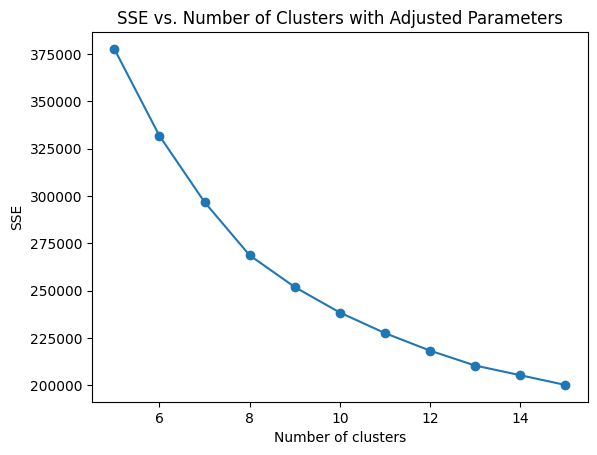

In [36]:
sse = []
for k in range(5, 16):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',   
        n_init=10,          
        max_iter=300,      
        tol=1e-4,           
        random_state=0      
    )
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.plot(range(5, 16), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters with Adjusted Parameters')
plt.show()


In [37]:
optimal_k = 8

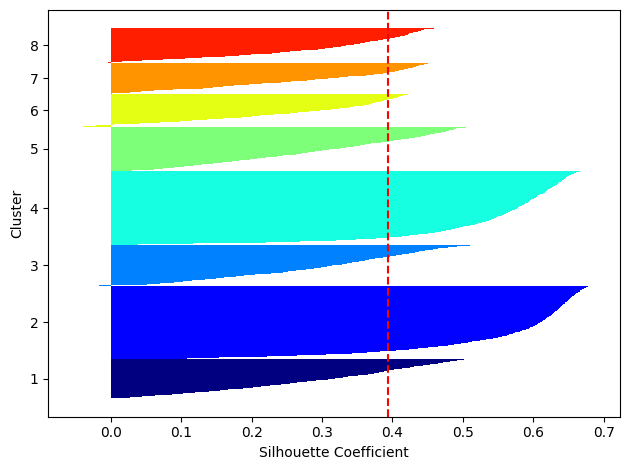

In [38]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=0)
y_km = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
n_clusters = len(np.unique(y_km))

for i, c in enumerate(np.unique(y_km)):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)  
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, edgecolor='none', color=color, height=1.0)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

    
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, np.unique(y_km) + 1)
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_pdf import PdfPages
import os
from PIL import Image

In [40]:
data = pd.read_csv("Data.csv")

In [41]:
image_names = data['image_name'].values
image_classes = data['class'].values


In [42]:
images_folder = "images"


In [43]:
missing_files = []

for img_name, img_class in zip(data['image_name'], data['class']):
    img_path = os.path.join(images_folder, img_class, img_name)
    if not os.path.exists(img_path):
        missing_files.append(img_path)

print(f"Number of missing files: {len(missing_files)}")
for file in missing_files[:10]: 
    print(file)

Number of missing files: 940
images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg
images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg
images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg
images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg
images/sign/video-TTDq3x6HSvFx3YRDH-frame-001745-BtqNudymACbxH4xNB_21903.jpg
images/sign/video-vvYEi6EdCrYXeHwpD-frame-002446-24thDFiFrP3iFuP3a_171694.jpg
images/sign/video-Bfb39QmAgJQZfE7Pu-frame-005043-wMLgsgNcBvRbFJf8D_141031.jpg
images/sign/video-kDDWXrnLSoSdHCZ7S-frame-006023-bWSyPEEDowYd34uAE_40703.jpg
images/sign/video-WiuWWrsHrJsDcfFzg-frame-008521-HPvtFGMY7q2zc9E2f_144972.jpg


In [44]:
images = []


for img_name, img_class in zip(image_names, image_classes):
   
    img_path = os.path.join(images_folder, img_class, img_name)
    
    try:
        
        img = Image.open(img_path).resize((32, 32))
        img_array = np.array(img)
        images.append(img_array)  
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")


images = np.array(images)


print(f"Loaded {len(images)} images with shape: {images[0].shape}")

Error loading image images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg: [Errno 2] No such file or directory: 'images/sign/video-aTxg8EcSRQyDvisMX-frame-001602-dbdbTPyNuPpwWo56m_166201.jpg'
Error loading image images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg: [Errno 2] No such file or directory: 'images/sign/video-Bfb39QmAgJQZfE7Pu-frame-024086-CRmPo7MQJXoz27JC8_141663.jpg'
Error loading image images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg: [Errno 2] No such file or directory: 'images/sign/video-GXXqNLCqyu72TLx5i-frame-000274-ikAWbQiLWQBhpbYYE_130288.jpg'
Error loading image images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg: [Errno 2] No such file or directory: 'images/sign/video-dgYrcYcm5G75w2GJc-frame-000422-HuJAKFBSZ4id6mWYQ_169091.jpg'
Error loading image images/sign/video-4zQqsnWRwK7SFPpBy-frame-001512-5qpFjGumiYZzpvoNk_157923.jpg: [Errno 2] No such file or directory: 

In [45]:
data['file_exists'] = data.apply(
    lambda row: os.path.exists(os.path.join(images_folder, row['class'], row['image_name'])), 
    axis=1
)
 

Core Samples:


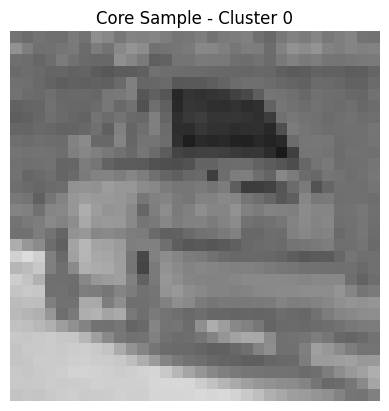

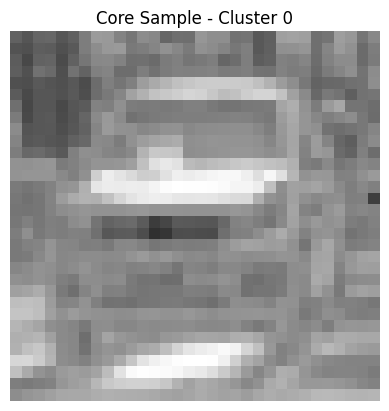

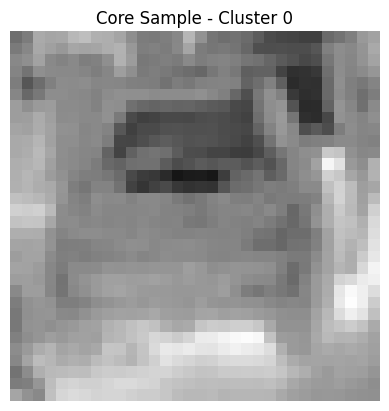

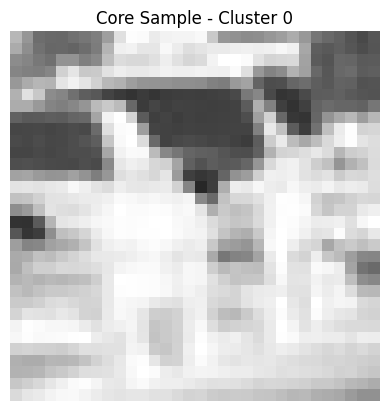

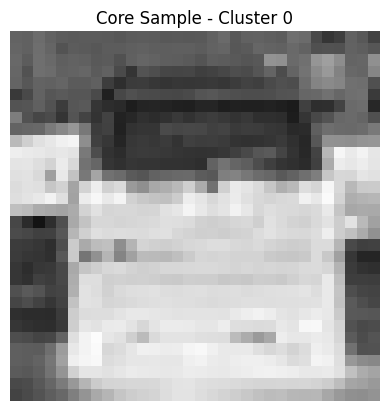

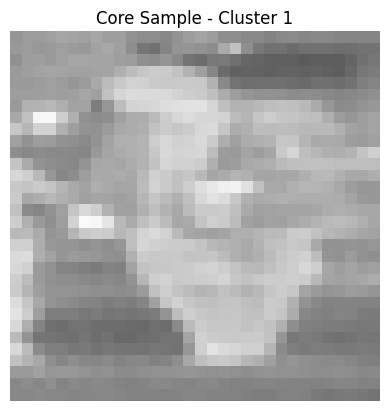

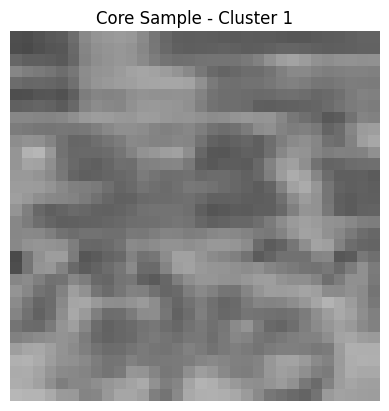

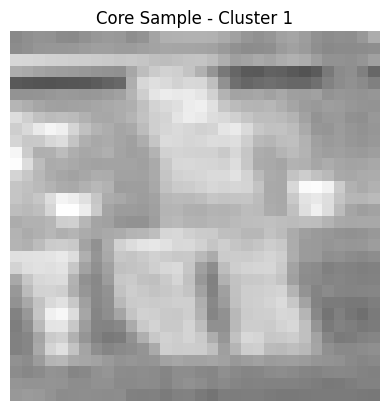

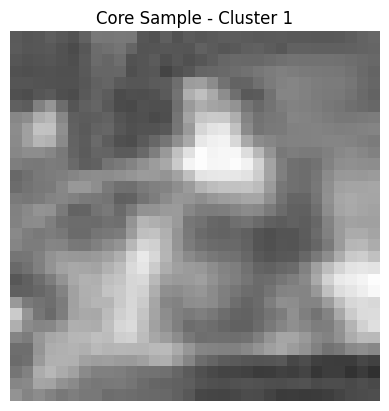

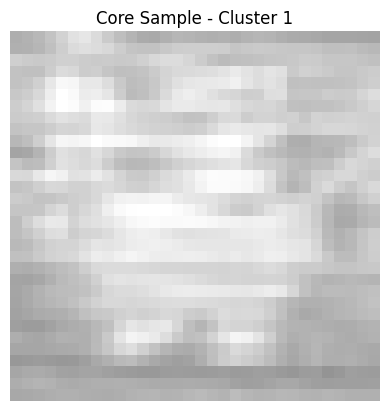

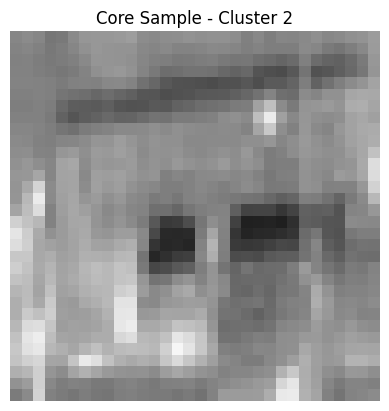

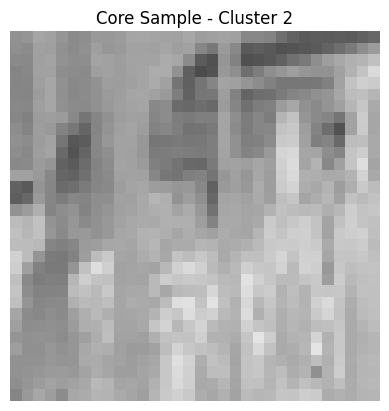

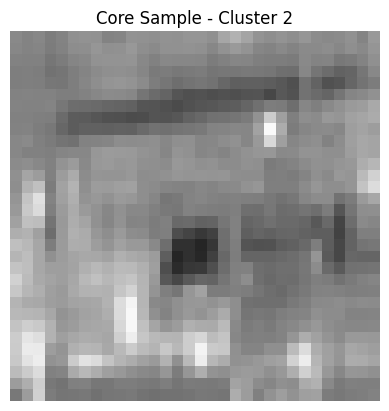

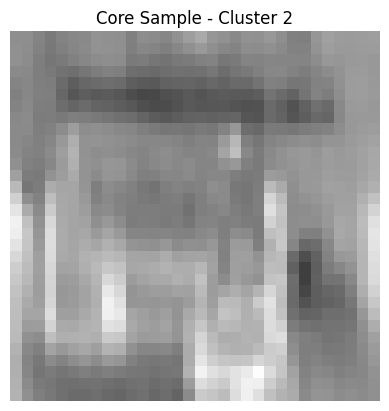

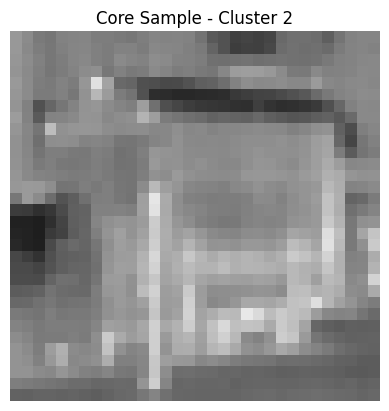

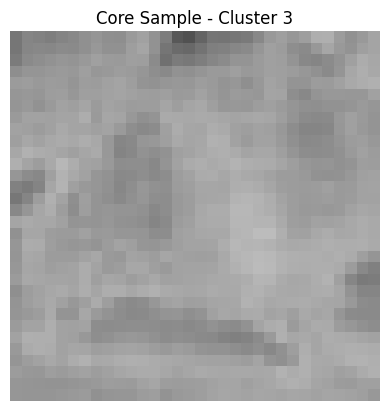

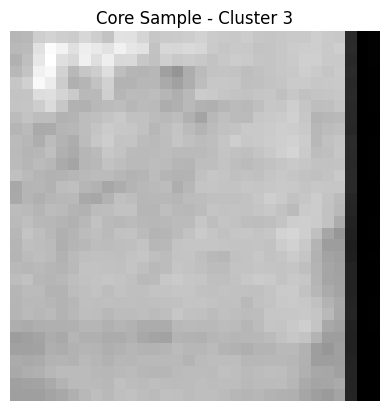

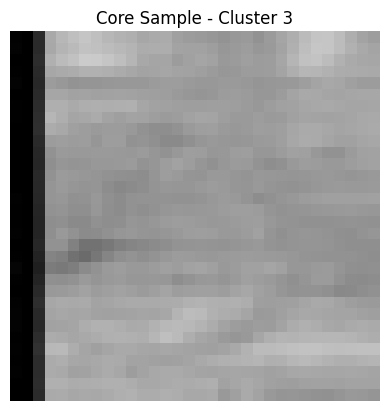

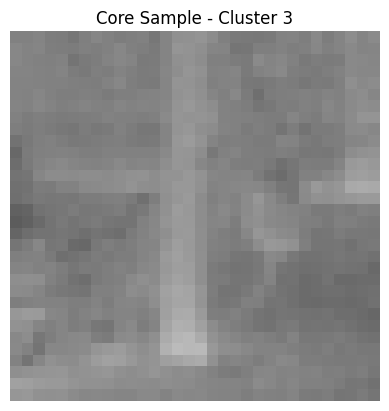

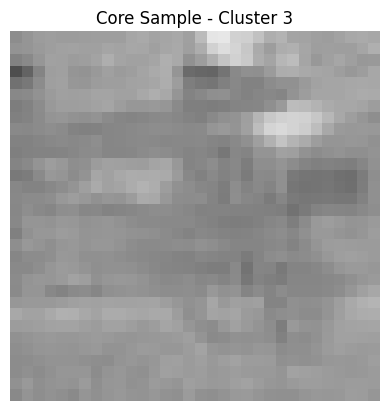

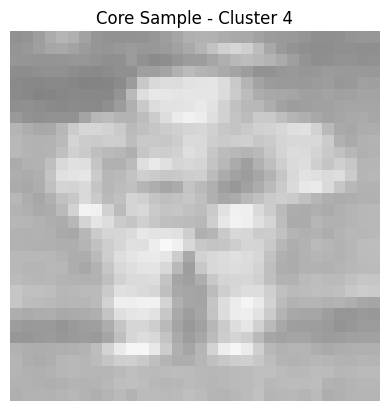

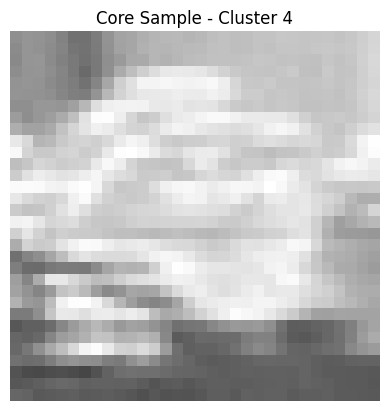

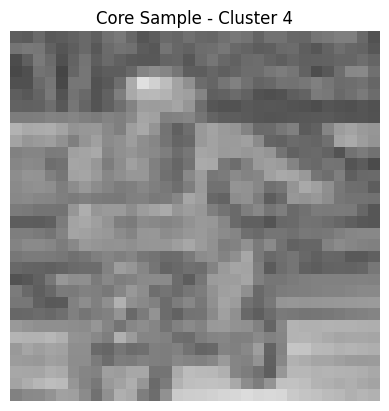

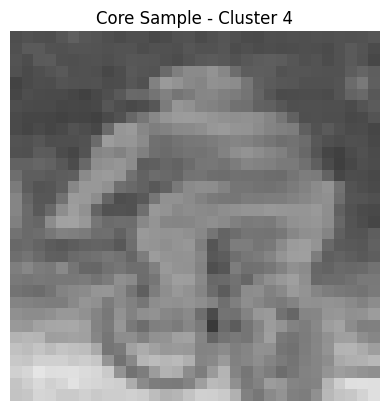

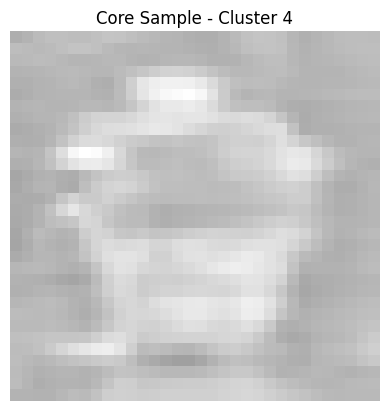

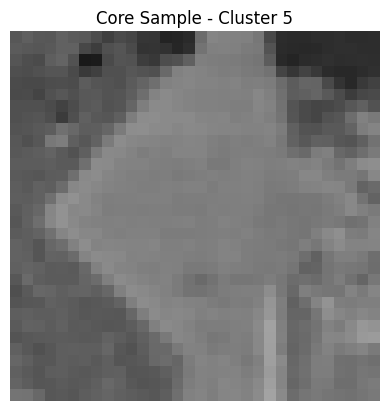

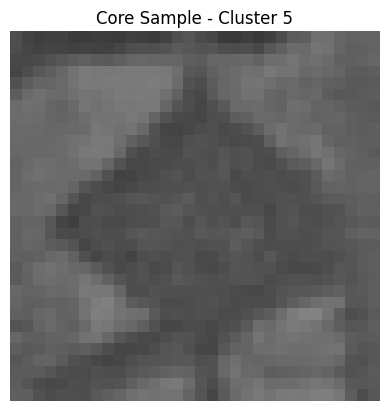

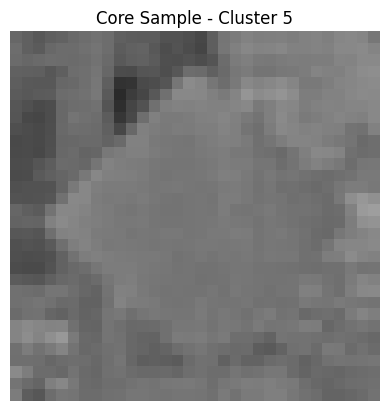

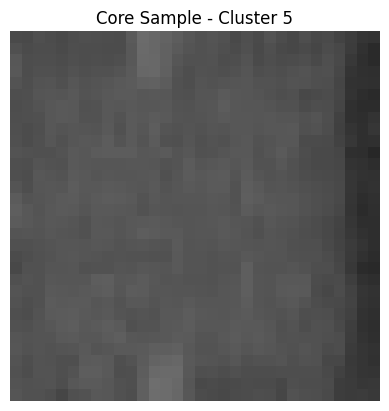

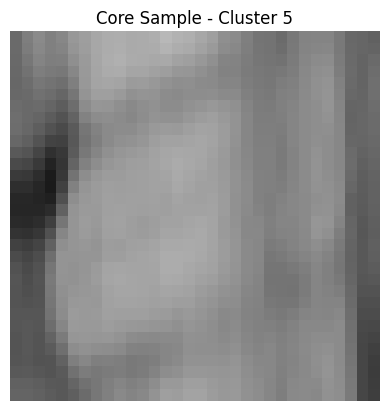

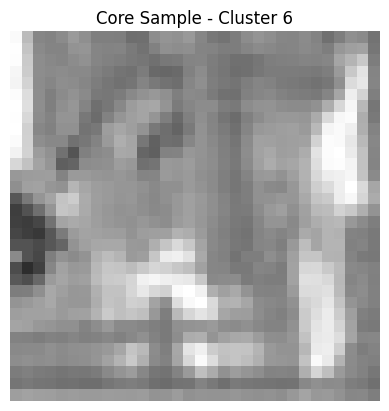

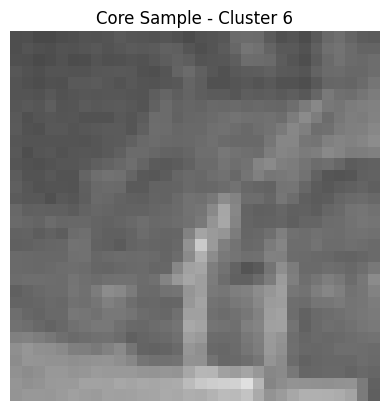

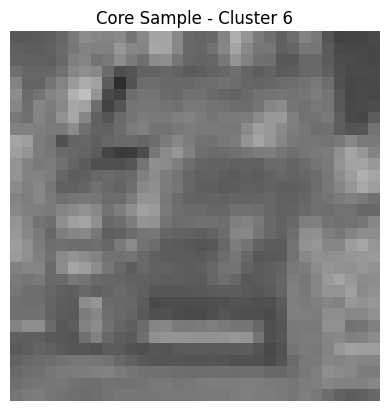

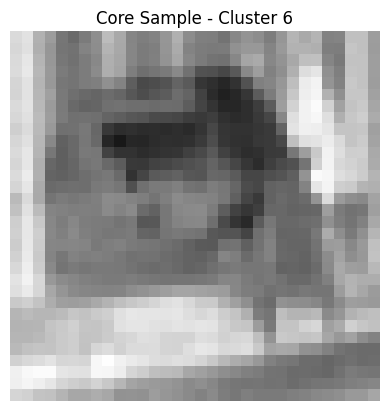

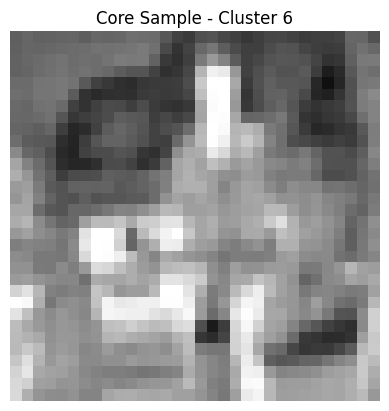

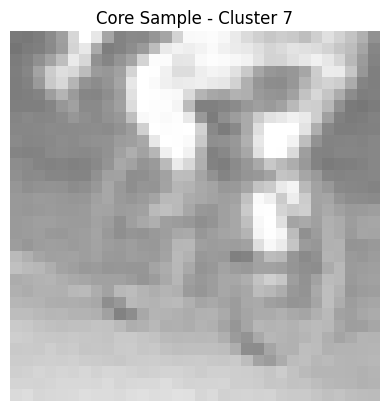

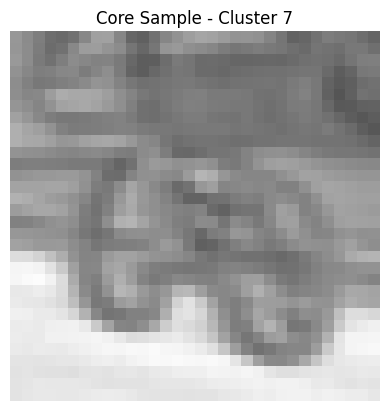

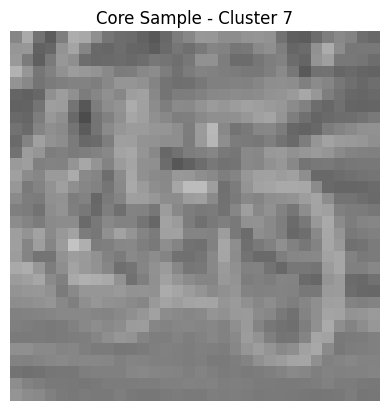

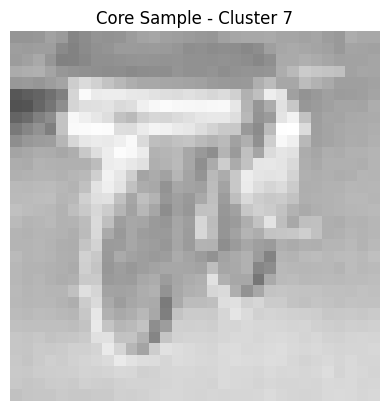

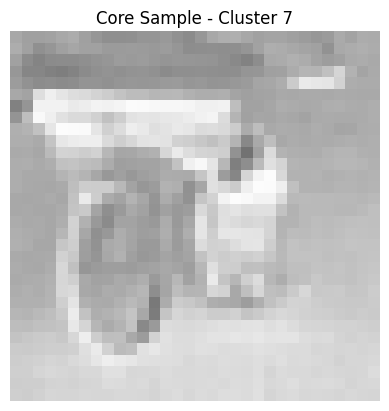

Boundary Samples:


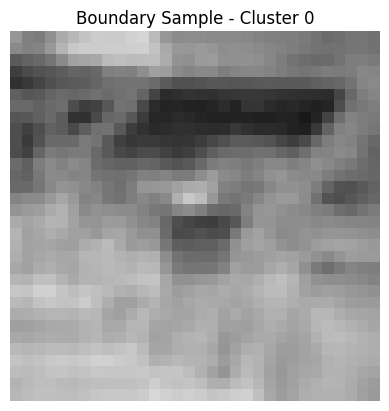

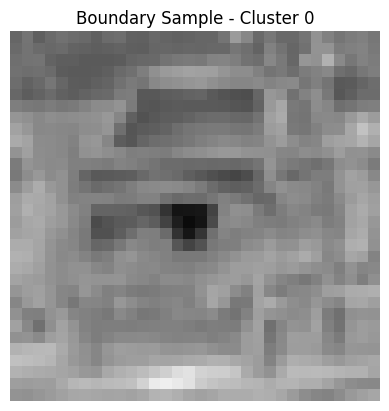

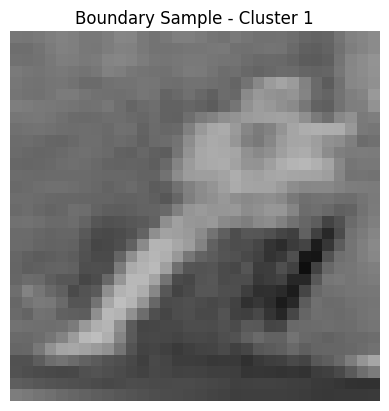

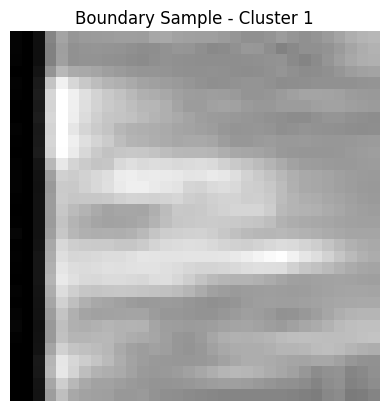

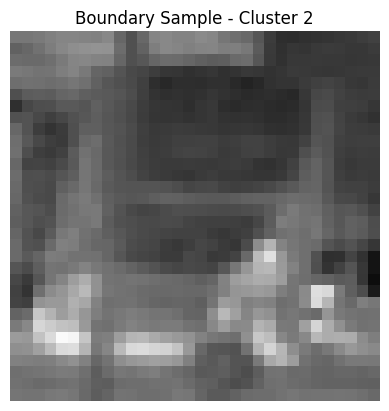

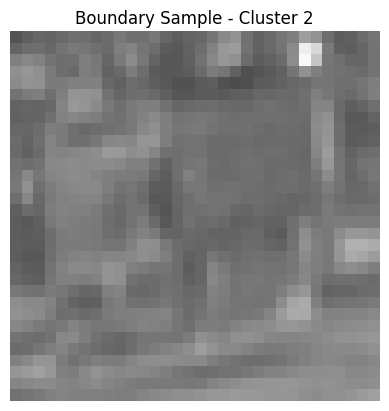

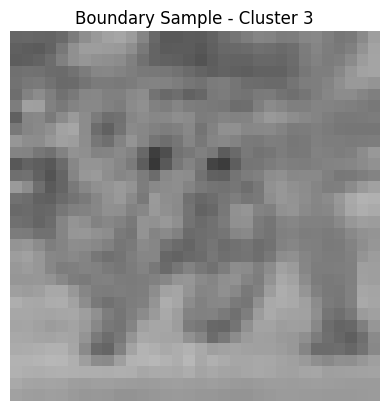

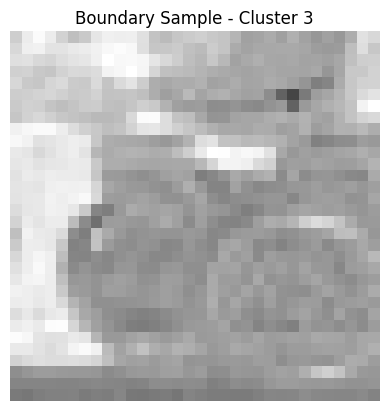

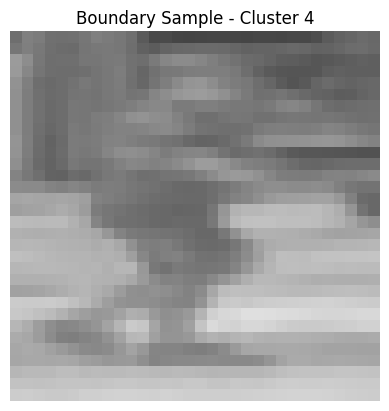

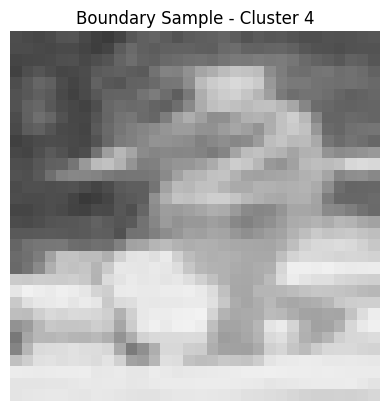

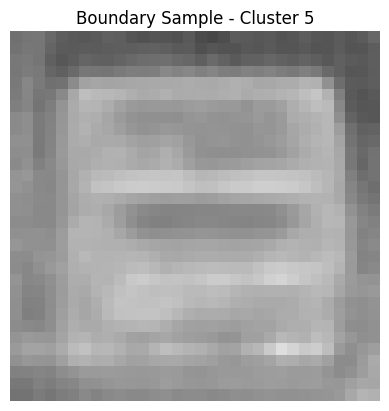

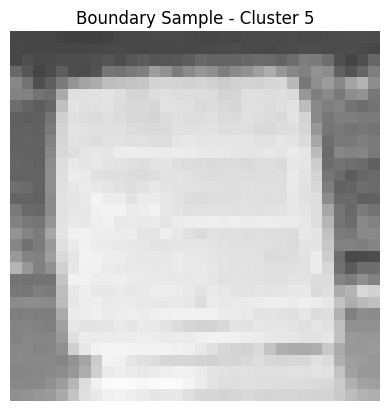

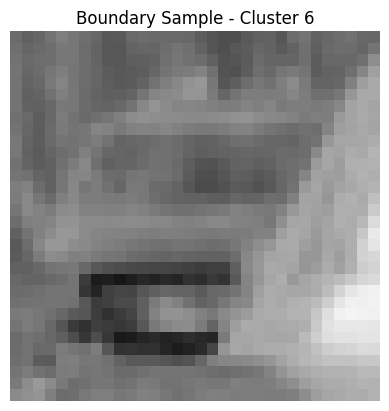

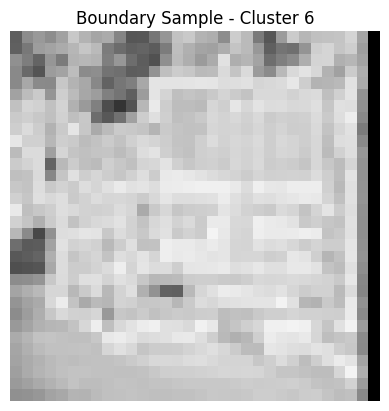

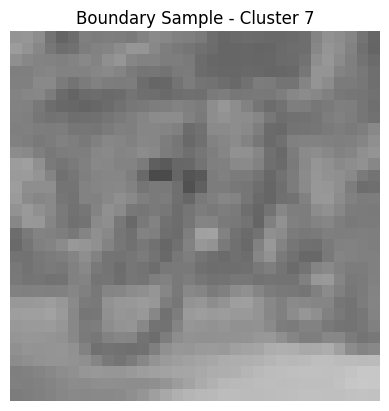

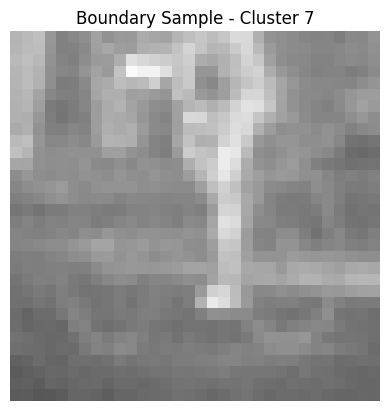

In [46]:
data_with_images = data[data['file_exists']]
X_with_images = data_with_images.iloc[:, 2:].values  
image_names_with_images = data_with_images['image_name'].values  
image_classes_with_images = data_with_images['class'].values  


optimal_k = 8  
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_with_images)
cluster_labels = kmeans.labels_  
silhouette_vals = silhouette_samples(X_with_images, cluster_labels)


core_samples = []
boundary_samples = []

for i in range(optimal_k):
    
    cluster_sil_vals = silhouette_vals[cluster_labels == i]
    cluster_indices = np.where(cluster_labels == i)[0]

    
    core_samples.extend(cluster_indices[cluster_sil_vals.argsort()[-5:]])  
    boundary_samples.extend(cluster_indices[cluster_sil_vals.argsort()[:2]])  


print("Core Samples:")
for index in core_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Core Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()


print("Boundary Samples:")
for index in boundary_samples:
    plt.imshow(images[index].reshape(32, 32, 3))
    plt.title(f"Boundary Sample - Cluster {cluster_labels[index]}")
    plt.axis('off')
    plt.show()

In [47]:

pdf_path = "K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf"
with PdfPages(pdf_path) as pdf:
    

    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 5, figsize=(20, 5), dpi=150)  
        fig.suptitle(f"Core Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        core_indices = cluster_indices[cluster_sil_vals.argsort()[-5:]] 
        
        for ax, index in zip(axes, core_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off') 
            ax.set_title(f"Sample {index}", fontsize=10) 
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)


    for i in range(optimal_k):  
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=150)  
        fig.suptitle(f"Boundary Samples - Cluster {i}", fontsize=16)
        
        cluster_sil_vals = silhouette_vals[cluster_labels == i]
        cluster_indices = np.where(cluster_labels == i)[0]
        boundary_indices = cluster_indices[cluster_sil_vals.argsort()[:2]]  
        
        for ax, index in zip(axes, boundary_indices):
            ax.imshow(images[index].reshape(32, 32, 3))  
            ax.axis('off')  
            ax.set_title(f"Sample {index}", fontsize=10)  
        
        pdf.savefig(fig, bbox_inches='tight')  
        plt.close(fig)

print(f"PDF saved successfully at {pdf_path}")

PDF saved successfully at K_Means_No_normalization_Core_Boundary_Samples_High_Quality.pdf


In [50]:
print(f"Shape of y (true labels): {y.shape}")
print(f"Shape of cluster_labels (predicted clusters): {cluster_labels.shape}")


Shape of y (true labels): (5000,)
Shape of cluster_labels (predicted clusters): (4060,)


In [52]:
X = data.iloc[:, 2:].values  
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels_all = kmeans.fit_predict(X)

In [53]:
ari = adjusted_rand_score(y, cluster_labels_all)
print(f"Adjusted Rand Index (ARI) for all samples: {ari:.5f}")

Adjusted Rand Index (ARI) for all samples: 0.75233


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler